# Lesson 01 - Importing Data and Quick Checks

We'll cover:  

  - Importing data with `pandas`
  - Taking a look at columns
  - Ensuring columns will match up

In [1]:
# Import all libraries first
import pandas as pd

%matplotlib inline

Information about the data:  

  - We have historical data from 2003-2004 that is clean and understood to be accurate
  - Sales data from 2003 - 2004 is in a single file `data/2003-2004_sales.csv`
  - We will pretend that we have just kicked off 2005 and January data is about to arrive
  - Data is updated monthly, so we will need a process to automatically check the data quality

It is good practice to read all of your data in at the beginning of your analysis so that people know where your sources are.

In [2]:
# Read historical data and take a look at it
data = pd.read_csv('data/2003-2004_sales.csv')
data.head()

,Unnamed: 0,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Assuming we know what the data is about (because we deal with it on a daily basis)  

What can we tell by using `data.head()` ?  

  - Our data is in tidy format
  - There are multiple variable types - continuous and categorical
  - There are multiple data types - int, string, float, datetime
  - There are NaN values present
  

Print out the columns of the data (some were hidden by `...` above)

In [3]:
# Take a look at the columns
data.columns

Index(['Unnamed: 0', 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
# Take another look to find all data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 26 columns):
Unnamed: 0          2345 non-null int64
ORDERNUMBER         2345 non-null int64
QUANTITYORDERED     2345 non-null int64
PRICEEACH           2345 non-null float64
ORDERLINENUMBER     2345 non-null int64
SALES               2345 non-null float64
ORDERDATE           2345 non-null object
STATUS              2345 non-null object
QTR_ID              2345 non-null int64
MONTH_ID            2345 non-null int64
YEAR_ID             2345 non-null int64
PRODUCTLINE         2345 non-null object
MSRP                2345 non-null int64
PRODUCTCODE         2345 non-null object
CUSTOMERNAME        2345 non-null object
PHONE               2345 non-null object
ADDRESSLINE1        2345 non-null object
ADDRESSLINE2        268 non-null object
CITY                2345 non-null object
STATE               1112 non-null object
POSTALCODE          2282 non-null object
COUNTRY             2345 non-null objec

What can we tell from using the `.info()` method?

  - There are 2345 entries in total
  - There are null values present in multiple columns (ADDRESSLINE2 has the most)
  - There are 2 `float64` columns and 8 `int64` columns
  - That leaves 16 columns of `object` type

In [5]:
# Take another look using describe
data.describe()

,Unnamed: 0,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000
mean,1407.736887,10231.498081,34.727505,83.702021,6.566738,3514.346328,2.992751,7.926226,2003.573561,100.827292
std,814.746301,75.892675,9.028843,20.141470,4.258489,1769.969374,1.118201,3.398720,0.494665,40.175060
min,0.000000,10100.000000,20.000000,27.220000,1.000000,577.600000,1.000000,1.000000,2003.000000,33.000000
25%,705.000000,10167.000000,27.000000,69.280000,3.000000,2207.520000,2.000000,5.000000,2003.000000,68.000000
50%,1403.000000,10228.000000,34.000000,95.800000,6.000000,3167.360000,3.000000,9.000000,2004.000000,99.000000
75%,2112.000000,10301.000000,43.000000,100.000000,10.000000,4441.500000,4.000000,11.000000,2004.000000,124.000000
max,2818.000000,10361.000000,55.000000,100.000000,18.000000,12536.500000,4.000000,12.000000,2004.000000,214.000000


The `.describe()` method allows us to extract a bit more information about our data.  

Did you notice that only numerical columns have been retained?  

What type of data does `.describe()` seem to help out with?  

What could be some easy "red flags" to warn us if new data could conflict with existing records?  

  - YEAR_ID, MONTH_ID: The single most obvious piece of information to tell us whether or not we're looking at existing or conflicting dates
  - ORDERNUMBER: min & max values - new data should lie outside of these values (but there could always be returns or perhaps some orders are processed faster than others which could throw us off)

The other fields will be important in terms of their range, the Inner Quartile Range (IQR) will give us a quick look as to whether or not the data fits into an average range.


In [6]:
# We have no need for these columns
data = data.drop(['Unnamed: 0', 'QTR_ID'], axis=1)

We can plot the numeric data to get a quick look at the distributions.

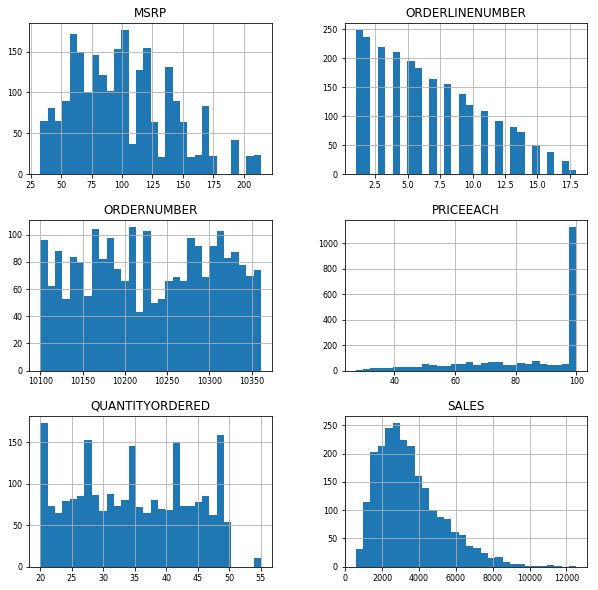

In [7]:
df = data[['MSRP', 'ORDERNUMBER', 'ORDERLINENUMBER', 'PRICEEACH', 'QUANTITYORDERED', 'SALES']]
df.hist(figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8);

Looking at the plot shows us a few things:  

  - ORDERNUMBER certainly appears more than once in the data set and at varying instances
  - SALES is really the only thing that appears to have a smooth distribution of some sort
  - PRICEEACH is extremely skewed near the 100 mark
  - ORDERLINENUMBER has a definite pattern
  - MSRP may be approximated by a distribution of some sort
  - QUANTITYORDERED seems to have spikes - likely a discount offered for certain levels of purchases

Writing tests for the numerical data should be straightforward. We will first use the most simple possible tests and then gradually improve them (if necessary). This method will basically follow the Occam's Razor principle - which is really handy for this type of work - especially when building a prototype.

We will start this off with `.min()` and `.max()` functions only, but this will not be robust enough. This will be handled in a later lesson because assuming that `min` and `max` values for historical is not a great test but is worth showing.

In [8]:
data_test = data.copy()

In [9]:
# All numbers should be larger than the minimum
# We will compare a the new dataframe with the test dataframe (new vs historical)
def test_col_gte_min_value(new_df, historical_df, col_name):
    min_value = historical_df[col_name].min()
    filtered_df = new_df[new_df[col_name] >= min_value]
    assert len(filtered_df) == len(new_df)

# Do the same for max value
def test_col_lte_max_value(new_df, historical_df, col_name):
    max_value = historical_df[col_name].max()
    filtered_df = new_df[new_df[col_name] <= max_value]
    assert len(filtered_df) == len(new_df)

**Note**: it is possible (and easy) to write a test that would do `min` and `max` in one function. However, this seems slightly clearer to me and when an error is returned it will be slightly easier to read.

**Note**: the test will not necessarily make a lot of sense to compare the existing dataframe with itself. It will be useful to compare new dataframes to the historical dataframes in the future because we will be utilizing those numbers.

In [10]:
# Future cases will have the new dataframe in place of the first data_test in these functions
col_name = 'MSRP'
test_col_gte_min_value(data_test, data_test, col_name)
test_col_lte_max_value(data_test, data_test, col_name)

In [11]:
col_name = 'PRICEEACH'
test_col_gte_min_value(data_test, data_test, col_name)
test_col_lte_max_value(data_test, data_test, col_name)

In [12]:
col_name = 'PRICEEACH'
test_col_gte_min_value(data_test, data_test, col_name)
test_col_lte_max_value(data_test, data_test, col_name)

In [13]:
col_name = 'SALES'
test_col_gte_min_value(data_test, data_test, col_name)
test_col_lte_max_value(data_test, data_test, col_name)

It doesn't make sense to compare certain columns against historical but should still be looked at from the `min`, `max`, and `range` perspective

In [14]:
# In these functions, the new dataframe will take the place of data_test
# This is suppposed to compare itself against itself
col_name = 'ORDERNUMBER'
test_col_gte_min_value(data_test, data_test, col_name)
test_col_lte_max_value(data_test, data_test, col_name)

In [15]:
col_name = 'ORDERLINENUMBER'
test_col_gte_min_value(data_test, data_test, col_name)
test_col_lte_max_value(data_test, data_test, col_name)

The following test will ensure there are numbers for every value between 

In [16]:
# There should be a sequence of ORDERNUMBER from min to max in which all values should live
def test_col_sequence(new_df, col_name):
    _min = new_df[col_name].min()
    _max = new_df[col_name].max()
    old_rng = new_df[col_name].unique().tolist()
    new_rng = list(range(_min, _max + 1))
    assert sorted(old_rng) == sorted(new_rng)

In [17]:
test_col_sequence(data_test, 'ORDERNUMBER')

AssertionError: 

Oh no, a failure! This is an example of where you should really know your data set. It would appear as if not all order numbers have been registered within this data. Perhaps this is because a transaction is only entered into the database after an invoice has been paid and there is still a list of accounts receivable. Or any number of other reasons...

The point is, we can't necessarily depend on this so we will have to come up with a better approach on how to utilize `ORDERNUMBER` in our tests. 

We will pick up here next time and start to develop some better tests and work out ideas for how to test this data in an automated fashion.